In [1]:
#Use one of these commands to download textblob
#pip install -U textblob
#python -m textblob.download_corpora

%matplotlib inline
from textblob import TextBlob
import pandas as pd
import numpy as np

In [2]:
#All news articles pulled
df_nike = pd.read_json('Nike_news.json')

#News articles with only Nike in the title
df_nike_clean = pd.read_json('Nike_news_clean.json')

In [3]:
df_nike_clean = df_nike_clean.sort_index()
df_nike_clean = df_nike_clean.reset_index()

In [4]:
#Sentiment Analysis using TextBlob
sent = []
for h in df_nike_clean['Headline']:
    headline = TextBlob(h)
    sent.append(headline.sentiment)
df_nike_clean['Sentiment'] = sent

In [5]:
df_nike_clean['Date'][0] = 'March 17, 2018'
df_nike_clean['Date'] = pd.to_datetime(df_nike_clean['Date'])

/Users/Alec/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [6]:
#Take the Pos/Neg part of the sentiment analysis
df_nike_clean['Sentiment'] = list(map(lambda x: x[0],df_nike_clean['Sentiment']))

In [7]:
#Consolidates all articles written in a day on one line, counts total number of articles, then sums/avgs the 
#sentiments of those articles.
#In a try/except because code runs into keyerror at the end due to my crappy code, but it still works. 
try:
    a=0
    i=0
    num_heads = 0
    sent_total = []
    row_list = []
    while(a<len(df_nike_clean)):
        num_heads = 0
        sent_total = []
        while(df_nike_clean['Date'][a]==df_nike_clean['Date'][i]):
            num_heads += 1
            sent_total.append(df_nike_clean['Sentiment'][i])
            i+=1
            if(i>=len(df_nike_clean)):
                break
        row_list.append([df_nike_clean['Date'][a],num_heads,sum(sent_total),np.average(sent_total)])
        a += num_heads
except Exception as e:
    pass

In [8]:
df_nikescore = pd.DataFrame(row_list)
df_nikescore.columns = ['Date','# Articles','Sum Sentiment','Avg Sentiment']

In [9]:
df_nikescore

,Date,# Articles,Sum Sentiment,Avg Sentiment
0,2018-03-17,1,0.500000,0.500000
1,2018-03-16,7,-0.505556,-0.072222
2,2018-03-15,8,0.625000,0.078125
3,2018-03-14,1,0.000000,0.000000
4,2018-03-13,2,0.250000,0.125000
5,2018-03-12,4,0.318182,0.079545
6,2018-03-02,2,-0.400000,-0.200000
7,2018-03-01,1,0.200000,0.200000
8,2018-02-28,1,0.500000,0.500000
9,2018-02-27,1,0.500000,0.500000


In [10]:
import matplotlib.pyplot as plt
from matplotlib.pylab import subplots
import seaborn as sns

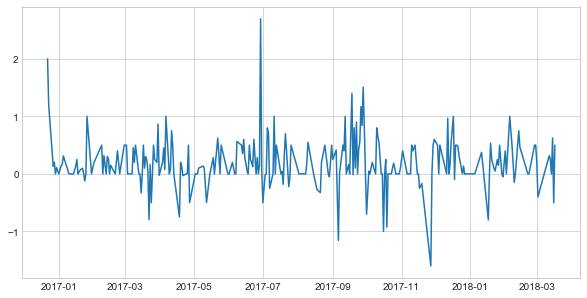

In [11]:
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10,5)

plt.plot(df_nikescore['Date'],df_nikescore['Sum Sentiment'])

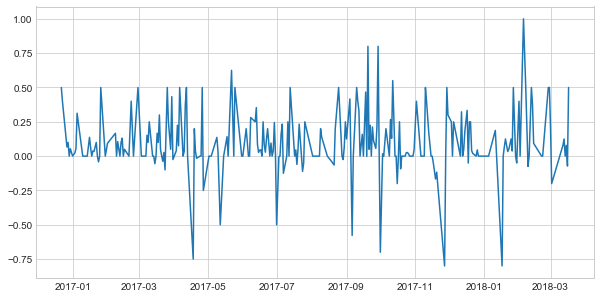

In [12]:
plt.plot(df_nikescore['Date'],df_nikescore['Avg Sentiment'])

In [20]:
nike_stock = pd.read_csv('NKE_1year.csv')

nike_stock = nike_stock.drop(['Adj Close','Volume'],1)

#Add new column named Daily Avg that averages the high and low of that day. 
nike_stock['Daily Avg'] = nike_stock[['High','Low']].mean(axis=1)
nike_stock['Daily Change']= nike_stock['Close'].diff()

#Change Date column to date that can be read by matplotlib and pandas
nike_stock['Date'] = pd.to_datetime(nike_stock['Date'])

In [21]:
#careful, don't run this cell more than once
nike_stock = nike_stock.iloc[15:]
nike_stock = nike_stock.iloc[:309]

In [23]:
nike_stock

,Date,Open,High,Low,Close,Daily Avg,Daily Change
15,2016-12-22,52.799999,53.000000,52.029999,52.139999,52.515000,-0.160000
16,2016-12-23,51.990002,52.349998,51.669998,51.910000,52.009998,-0.229999
17,2016-12-27,51.799999,52.250000,51.200001,51.290001,51.725001,-0.619999
18,2016-12-28,51.310001,51.500000,50.869999,51.020000,51.185000,-0.270001
19,2016-12-29,51.000000,51.240002,50.880001,51.060001,51.060001,0.040001
20,2016-12-30,51.099998,51.330002,50.700001,50.830002,51.015001,-0.229999
21,2017-01-03,51.990002,52.500000,51.770000,51.980000,52.135000,1.149998
22,2017-01-04,52.230000,53.349998,52.090000,53.070000,52.719999,1.090000
23,2017-01-05,52.919998,53.099998,52.439999,53.060001,52.769998,-0.009999
24,2017-01-06,53.090000,54.090000,52.980000,53.910000,53.535000,0.849999


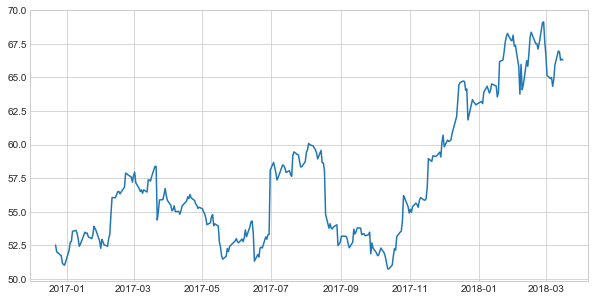

In [24]:
plt.plot(nike_stock['Date'],nike_stock['Daily Avg'])

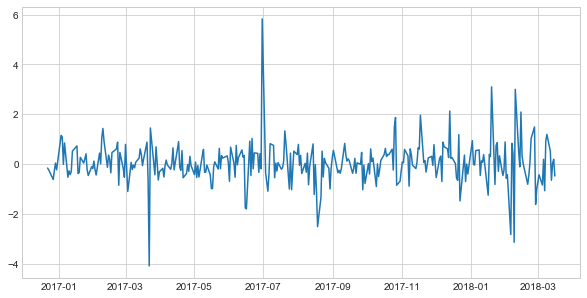

In [25]:
plt.plot(nike_stock['Date'],nike_stock['Daily Change'])

In [29]:
#Merge the Sentiment analysis and stock price dataframes on Date. 
nike_all = df_nikescore.merge(nike_stock,how='outer')
nike_all.sort_values(by='Date')

,Date,# Articles,Sum Sentiment,Avg Sentiment,Open,High,Low,Close,Daily Avg,Daily Change
262,2016-12-22,4.0,2.000000,0.500000,52.799999,53.000000,52.029999,52.139999,52.515000,-0.160000
261,2016-12-23,3.0,1.200000,0.400000,51.990002,52.349998,51.669998,51.910000,52.009998,-0.229999
260,2016-12-27,2.0,0.132738,0.066369,51.799999,52.250000,51.200001,51.290001,51.725001,-0.619999
259,2016-12-28,2.0,0.200000,0.100000,51.310001,51.500000,50.869999,51.020000,51.185000,-0.270001
258,2016-12-29,2.0,0.000000,0.000000,51.000000,51.240002,50.880001,51.060001,51.060001,0.040001
257,2016-12-30,2.0,0.108333,0.054167,51.099998,51.330002,50.700001,50.830002,51.015001,-0.229999
256,2017-01-01,1.0,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
255,2017-01-03,6.0,0.136364,0.022727,51.990002,52.500000,51.770000,51.980000,52.135000,1.149998
254,2017-01-04,3.0,0.166667,0.055556,52.230000,53.349998,52.090000,53.070000,52.719999,1.090000
253,2017-01-05,1.0,0.312500,0.312500,52.919998,53.099998,52.439999,53.060001,52.769998,-0.009999


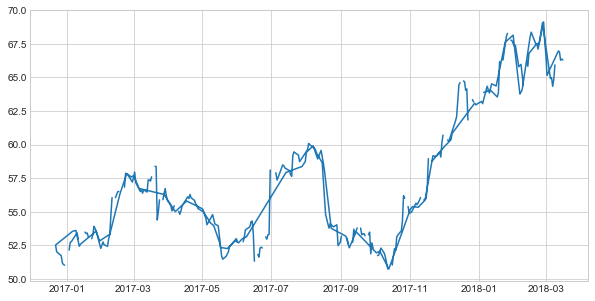

In [30]:
plt.plot(nike_all['Date'],nike_all['Daily Avg'])

In [31]:
#drop all columns with NA values (problematic because we drop weekends but there is still news on weekends)
nike_all = nike_all.dropna()

In [33]:
nike_all = nike_all[['Date','# Articles','Sum Sentiment','Avg Sentiment','Daily Change']]

In [35]:
nike_all.corr()

,# Articles,Sum Sentiment,Avg Sentiment,Daily Change
# Articles,1.000000,0.075750,-0.133648,0.096138
Sum Sentiment,0.075750,1.000000,0.751014,-0.016505
Avg Sentiment,-0.133648,0.751014,1.000000,-0.105156
Daily Change,0.096138,-0.016505,-0.105156,1.000000


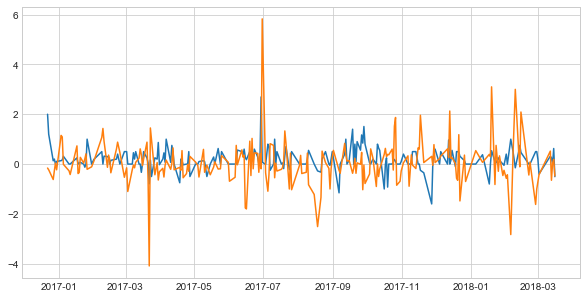

In [37]:
#Visually look at sum sentiment vs daily change. 
fig,ax = plt.subplots()
ax.plot(nike_all['Date'],nike_all['Sum Sentiment']) 
ax.plot(nike_all['Date'],nike_all['Daily Change']) 

I think I want to figure out a way to compare things without dropping all the NA rows. Next step would be to maybe anayze everything instead of a daily change on a weekly basis. Also I only looked at the "cleaned" Nike data. 